### Numerical Analysis
(Formative Assessment 4)

**Romand Lansangan**

---

In [8]:
import numpy as np 
import pandas as pd

## $\int_0^2 x^2 \ln(x^2 + 1) dx$ using $h = 0.25$. 

The interval is $[a, b] = [0, 2]$, and the number of subintervals is $n = \frac{b-a}{h} = \frac{2-0}{0.25} = 8$.

$x_j = a + jh$ for each $j=0,1, . . . , n$ 

In [14]:
n = 8
h_s = np.linspace(0, 2, n+1)
h_s

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

f(x_j)

In [17]:
eq = "(x**2) * ln(x**2 + 1)"

fh = [sip.eq_solver(eq, h) for h in h_s]
fh_ = pd.Series(fh)
fh_

0    0.000000
1    0.003789
2    0.055786
3    0.251036
4    0.693147
5    1.470286
6    2.651974
7    4.293008
8    6.437752
dtype: float64

### Composite Trapezoidal Rule

Recall that the formula for Composite Trapezoidal Rule is:

$$\int_a^b f(x) dx \approx \frac{h}{2} [f(x_0) + 2\sum_{j=1}^{n-1} f(x_j) + f(x_n)]$$




With $h=0.25$ and $n=8$; 

$$
\int_0^2 x^2 \ln(x^2 + 1) dx \approx \frac{0.25}{2} [f(a) + 2\sum_{j=1}^{7} f(x_j) + f(b)]
$$

Lets start with $ 2\sum_{j=1}^{n-1} f(j)$

$$ 2\sum_{j=1}^{7} f(x_j)$$

In [18]:
first_ind = list(range(1,8))

first_ = fh_[first_ind]
first_

1    0.003789
2    0.055786
3    0.251036
4    0.693147
5    1.470286
6    2.651974
7    4.293008
dtype: float64

In [19]:
first_sum = first_.sum() * 2
first_sum

18.83805374434219

$$
\int_0^2 x^2 \ln(x^2 + 1) dx \approx \frac{0.25}{2} [f(a) + 2\sum_{j=1}^{7} f(x_j) + f(b)]
$$

In [20]:
inside_term = fh_[0] + first_sum + fh_[n]

print("Inside term:", inside_term)

outside_term = 0.25 / 2

approximate_1 = outside_term * inside_term

print("Approximate using Composite Trapezoidal Rule:", approximate_1)

Inside term: 25.275805394078592
Approximate using Composite Trapezoidal Rule: 3.159475674259824


$$\int_0^2 x^2 \ln(x^2 + 1) dx \approx 3.159475674259824$$

### Composite Simpson's Rule
Recall that the formula for composite Simpson's rule is:

$$
\int_a^b f(x) dx = \frac{h}{3} [f(a) + 2 \sum^{(n/2) - 1}_{j=1} f(x_{2j}) + 4 \sum^{n/2}_{j=1} f(x_{2j-1}) + f(b)] - \text{error term} 
$$


With $h=0.25$ and $n=8$; 

$$
\int_0^2 x^2 \ln(x^2 + 1) dx = \frac{0.25}{3} [f(a) + 2 \sum^{3}_{j=1} f(x_{2j}) + 4 \sum^{4}_{j=1} f(x_{2j-1}) + f(b)] - \text{error term} 
$$

For $2 \sum^{(n/2) - 1}_{j=1} f(x_{2j})$

$$2 \sum^{(8/2) - 1}_{j=1} f(x_{2j})$$
$$2 \sum^{3}_{j=1} f(x_{2j})$$
$$2[f(x_2) + f(x_4) + f(x_6)]$$

In [21]:
first_ind = [2, 4, 6]
first_ = fh_[first_ind]*2
first_

2    0.111572
4    1.386294
6    5.303947
dtype: float64

In [22]:
first_sum = first_.sum()
first_sum

6.801813620314403

For $4 \sum^{n/2}_{j=1} f(x_{2j-1})$

$$4 \sum^{4}_{j=1} f(x_{2j-1})$$
$$4[f(x_1) + f(x_3) + f(x_5) + f(x_7)]$$

In [23]:
second_ind = [1,3,5,7]
second_ = fh_[second_ind]*4
second_

1     0.015156
3     1.004146
5     5.881146
7    17.172032
dtype: float64

In [24]:
second_sum = second_.sum()
second_sum

24.072480248055577

$$
\int_0^2 x^2 \ln(x^2 + 1) dx = \frac{0.25}{3} [f(a) + 2 \sum^{3}_{j=1} f(x_{2j}) + 4 \sum^{4}_{j=1} f(x_{2j-1}) + f(b)] - \text{error term} 
$$

In [25]:
fa = fh_[0]
fb = fh_[n]
inside_term = fa+fb+first_sum+second_sum
print("Inside Term:", inside_term)

outside_term = 0.25 / 3

approximate_2 = inside_term*outside_term
print("Approximate using Composite Simpson's Rule:", approximate_2)

Inside Term: 37.31204551810638
Approximate using Composite Simpson's Rule: 3.1093371265088647


$$\int_0^2 x^2 \ln(x^2 + 1) dx \approx 3.1093371265088647$$

### Composite Midpoint Rule

Recall that the formula for Composite Midpoint Rule is:

$$
\int_a^b f(x) dx \approx 2h \sum^{n/2}_{j=0} f(x_{2j})
$$

but h is different in this.

$$h = \frac{b-a}{n+2} $$

$$0.25 = \frac{2-0}{n+2}$$

$$n+2 = 2/0.25 = 8$$

$$ n = 8-2 = 6$$

$x_j =a + (j+1)h$ for $j = -1, 0, ..., n+1$
 

In [26]:
n = 6
h = 0.25
a = 0
x = [a + (j+1)*h for j in range(-1, n+2)]
f_x = [sip.eq_solver(eq, x) for x in x]
f_x_ = pd.Series(f_x, index=list(range(-1,n+2)))

f_x_

-1    0.000000
 0    0.003789
 1    0.055786
 2    0.251036
 3    0.693147
 4    1.470286
 5    2.651974
 6    4.293008
 7    6.437752
dtype: float64



$$\int_0^2 x^2 \ln(x^2 + 1) dx \approx 2(0.25) \sum^{3.5}_{j=0} f(x_{2j})$$


$$ \approx 0.5[f(0) + f(2) + f(4) + f(6)]$$


In [27]:
f_ind = list(range(0,7, 2))

inside_term = f_x_[f_ind]
inside_term

0    0.003789
2    0.251036
4    1.470286
6    4.293008
dtype: float64

In [28]:
inside_term_sum = inside_term.sum()

print("Inside Sum:", inside_term_sum)

approximate_3 = 0.5 * inside_term_sum

print("Approximate using Composite Midpoint Rule:", approximate_3)

Inside Sum: 6.018120062013894
Approximate using Composite Midpoint Rule: 3.009060031006947


$$\int_0^2 x^2 \ln(x^2 + 1) dx \approx 3.009060031006947$$

---


## Determine the values of n and h required to approximate $\int_0^2 \frac{1}{x+4} dx$ to within $10^{-5}$

### Composite Trapezoidal Rule

Recall that the error term for this rule is:
$$\frac{b-a}{12}h^2 f'' (\mu)$$

where $\mu \in (a,b)$

$$f(x) =  \frac{1}{x+4}$$

$$f'(x) = -\frac{1}{(x+4)^2}$$

$$f''(x) = \frac{2}{(x+4)^3}$$

Since $\mu \in (0,2)$,

$$|\frac{1}{6} h^2 f''(\mu)| < \frac{1}{6} h^2 f(0) = \frac{1}{6} h^2 \frac{2}{4^3}$$

$$|\frac{1}{6} h^2 f''(\mu)| < \frac{1}{6} h^2 \frac{2}{64} = \frac{2}{384} h^2$$


Thus, solving for 

$$ \frac{2}{384} h^2 < 10^{-5}$$

$$h^2 < \frac{384}{10^5 \times 2}$$

$$h < \sqrt{\frac{384}{10^5 \times 2}}$$


In [ ]:
(384/((10**5) * 2))**0.5

0.04381780460041329

$$h < 0.04381780460041329$$

Recall that

$$h = \frac{b-a}{n}$$

$$h = \frac{2}{n} < 0.04381780460041329$$

$$n > \frac{2}{0.04381780460041329}$$

In [ ]:
2/0.04381780460041329

45.64354645876384

$$n > 45.64354645876384$$
$$n \geq 46$$

---

### Composite Simpson's Rule

Recall that the error term for this rule is:

$$\frac{b-a}{180}h^4 f^{(4)}(\mu)$$

where $\mu \in (a,b)$

$$f^{(3)}(x) = \frac{-6}{(x+4)^4}$$

$$f^{(4)}(x) = \frac{24}{(x+4)^5}$$

$$|\frac{2}{180}h^4 f^{(4)}(\mu)| < \frac{2}{180}h^4 \frac{24}{4^6}$$

$$|\frac{2}{180}h^4 f^{(4)}(\mu)| < \frac{2}{180}h^4 \frac{24}{4096}$$

$$|\frac{2}{180}h^4 f^{(4)}(\mu)| < \frac{48}{737280} h^4$$

Solving for:

$$\frac{48}{737280} h^4 < \frac{1}{10^5}$$

$$h^4 < \frac{737280}{48 \times 10^5}$$

$$h < (\frac{737280}{48 \times 10^5})^{1/4}$$

In [ ]:
(737280/(48 * (10**5))) ** (1/4)

0.626033832029315

$$h < 0.626033832029315$$

$$h = \frac{b-a}{n} = \frac{2}{n} < 0.626033832029315$$

$$n > \frac{2}{0.626033832029315}$$

In [ ]:
2/0.626033832029315

3.194715521231362

$$n>3.194715521231362$$

$$n \geq 4$$

---

### Composite Midpoint Rule

Recall that this rule has an error term of:

$$\frac{b-a}{6}h^2 f''(\mu)$$

where $\mu \in (a,b)$

$$|\frac{2}{6} h^2 f''(\mu)| < \frac{1}{3}h^2 \frac{2}{64} = \frac{2}{192}h^2$$

Solving for:

$$\frac{2}{192}h^2 < \frac{1}{10^5}$$

$$h^2 < \frac{192}{2 \times 10^5}$$

$$h < \sqrt{\frac{192}{2 \times 10^5}}$$

In [ ]:
(192 / (2 * (10**5)))**0.5

0.030983866769659335

$$h < 0.030983866769659335$$

Recall that:
$$h=\frac{b-a}{n+2}$$

$$h = \frac{2}{n+2} < 0.030983866769659335$$

$$n+2 > \frac{2}{0.030983866769659335}$$

$$n > \frac{2}{0.030983866769659335} - 2$$

In [ ]:
(2/0.030983866769659335) - 2

62.549722436790276

$$n > 62.549722436790276$$

$$n \geq 63$$

---

## Approximate $\int_0^1 x^2 e^x dx$ using Gaussian Quadrature with n=2

Since the Guassian quarature rules are defined on the interval $[-1,1]$, we ought to transpose the interval of integration. 

$$x(t) = \frac{(b-a)t + (b+a)}{2} = \frac{(1-0)t + (1+0)}{2} = \frac{t+1}{2}$$
    
Then, $dx = \frac{b-a}{2} dt = \frac{1}{2} dt$.

Consquentyly, $f(x) = x^2 e^x$ becomes $f\left(\frac{t+1}{2}\right) = \left(\frac{t+1}{2}\right)^2 e^{\frac{t+1}{2}}$.

$$\int_0^1 x^2 e^x dx = \int_{-1}^1 f\left(\frac{t+1}{2}\right) \frac{1}{2} dt = \int_{-1}^1 \frac{1}{2} \left(\frac{t+1}{2}\right)^2 e^{\frac{t+1}{2}} dt$$

Let $g(t) = \frac{1}{2} \left(\frac{t+1}{2}\right)^2 e^{\frac{t+1}{2}}$.

Let us now find the nodes and the wieghts for $n=2$.

From the slide (Page 36), the nodes ($t_i$) and weights ($c_i$) needed for Guassian Quarature are:

$t_1 = -0.5773502692$, $c_1 = 1.0$

$t_2 = 0.5773502692$, $c_2 = 1.0$

Recall that the formula for Guassian Quarature rule is:

$$\int_{-1}^1 g(t) dt \approx \sum_{i=1}^n c_i g(t_i)$$

For $n=2$:
$$\int_{-1}^1 g(t) dt \approx c_1 g(t_1) + c_2 g(t_2)$$

In [ ]:
eq = "0.5*(((x+1)/2)**2 )* e^(x/2) * e^(0.5)"
ts = [-0.5773502692, 0.5773502692]

gt = [sip.eq_solver(eq, t) for t in ts]
gt

[0.027583440137066442, 0.6843583341162582]

In [ ]:
print("Approximation:", sum(gt))

Approximation: 0.7119417742533247


$$\int_{-1}^1 g(t) dt \approx \sum_{i=1}^n c_i g(t_i) \approx 0.7119417742533247$$

---

## Use Guassian double integral to with n=m=4 to approximate 
$$\int_1^{1.5} \int_0^x (x^2 + \sqrt{y})dydx$$ 

In [30]:
from scipy.special import roots_legendre

def gaussian_double_integral_simple(f, c, d, a, b, m, n):
    rm, cm = roots_legendre(m)
    rn, cn = roots_legendre(n)

    h1 = (b - a) / 2.0
    h2 = (b + a) / 2.0
    J = 0.0

    for i in range(m):
        x = h1 * rm[i] + h2
        c1 = c(x)
        d1 = d(x)
        k1 = (d1 - c1) / 2.0
        k2 = (d1 + c1) / 2.0
        JX = 0.0

        for j in range(n):
            y = k1 * rn[j] + k2
            Q = f(x, y)
            JX = JX + cn[j] * Q

        J = J + cm[i] * k1 * JX

    J = h1 * J

    return J

def f(x, y):
    return x**2 + np.sqrt(y)

def c(x):
    return 0.0

def d(x):
    return x

a = 1.0
b = 1.5
m = 4
n = 4

approximation = gaussian_double_integral_simple(f, c, d, a, b, m, n)
print(f"The approximate value of the integral is: {approximation}")

The approximate value of the integral is: 1.484620577109789


---

## Show that  $y' = y \cos t$, $0 \le t \le 1$, $y(0) = 1$

Applying the Mean Value theorem to $f(t, y) = y \cos t$, we find that when $y_1 \ne y_2$, a number $\xi$ between $y_1$ and $y_2$ exists with
$$ \frac{f(t, y_2) - f(t, y_1)}{y_2 - y_1} = \frac{\partial}{\partial y} f(t, \xi) = \frac{\partial}{\partial y} (\xi \cos t) = \cos t. $$

Thus,
$$ |f(t, y_2) - f(t, y_1)| = |(y_2 - y_1) \cos t| = |y_2 - y_1| |\cos t|. $$
For $0 \le t \le 1$, we have $|\cos t| \le 1$.
Therefore,
$$ |f(t, y_2) - f(t, y_1)| \le 1 \cdot |y_2 - y_1|. $$
And $f$ satisfies a Lipschitz condition in the variable $y$ with Lipschitz constant $L = 1$.

Additionally, $f(t, y) = y \cos t$ is continuous when $0 \le t \le 1$ and $-\infty < y < \infty$, so the theorem implies that a unique solution exists to this initial-value problem for $0 \le t \le 1$.

---



## Use Euler's method to approximate the solutions to
$$ y' = \frac{2 - 2ty}{t^2 + 1}, \quad 0 \leq t \leq 1, \quad y(0) = 1, \quad \text{with } h = 0.1 $$
Tabulate all four results to compare and discuss the the differences with the actual solution :
$$ y(t) = \frac{2t + 1}{t^2 + 1}. $$

Let N = 5

1. Euler method

Let N=10
Recall that in Euler method: $w_{i+1}= w_i + h f(t_i, w_i)$ for each $i=1,2,..., N-1$

$$
\begin{align*}
w_o &= y(0) = 1 \\
w_1 &= w_0 + 0.1(\frac{2-2(0)(w_0)}{0^2 + 1}) = 1 + 0.1(2) = 1.2 \\
w_2 &= w_1 + 0.1(\frac{2-2(0.1)(w_1)}{0.1^2 + 1}) \approx 1.3742574257425741\\
w_3 &= w_2 + 0.1(\frac{2-2(0.2)(w_2)}{0.1^2 + 1}) \approx 1.5137090632140136
\end{align*}
$$
and so on

In [78]:
def f(x,y):
    num = 2 - 2*x*y
    denom = x**2 + 1
    return num / denom

def euler(res, w_0, step):
    return w_0 + step*res

N = 10
step = 0.1
a = 0 # start
w_0 = 1
result = [{"t":0, "w_i" : w_0}]

for i in range(1, N+1):
    t = a + (i-1)*step

    f_xy = f(t,w_0)

    w_i = euler(f_xy, w_0, step)

    result.append({"t":t+step, "w_i" : w_i})

    w_0 = w_i

result_euler = pd.DataFrame(result).set_index("t")
result_euler

,w_i
t,
0.0,1.000000
0.1,1.200000
0.2,1.374257
0.3,1.513709
0.4,1.613872
0.5,1.674984
0.6,1.700985
0.7,1.697957
0.8,1.672646



2. Modified Euler method

For Modified euler:

$$w_{i+1}= w_i + \frac{h}{2}[f(t_i, w_i) + f(t_{i+1}, \underbrace{w_i + hf(t_i, w_i)}_{euler})]$$
for $i=1,2,...,N-1$

In [72]:
def euler_mod(res, res_2, w_0, step):
    return w_0 + (step/2)*(res+res_2)

N = 10
step = 0.1
a = 0 # start
w_0 = 1
result = [{"t":0, "w_i" : w_0}]

for i in range(1, N+1):
    t = a + (i-1)*step

    f_xy = f(t,w_0)
    
    eul = euler(res=f_xy, w_0=w_0, step=step)

    f_xy_2 = f(t + step, eul)

    w_i = euler_mod(f_xy, f_xy_2, w_0, step)

    result.append({"t":t+step, "w_i" : w_i})

    w_0 = w_i

result_euler_mod = pd.DataFrame(result).set_index("t")
result_euler_mod

,w_i
t,
0.0,1.000000
0.1,1.187129
0.2,1.344353
0.3,1.465527
0.4,1.549061
0.5,1.597266
0.6,1.615016
0.7,1.608321
0.8,1.583221


3. Midpoint method

$$
w_{i+1} = \underbrace{w_i + hf(t_1 + h/2,\underbrace{w_i + \frac{h}{2} f(t_i, w_i)}_{\text{euler method with h/2 step}})}_{\text{normal euler method}}
$$

In [73]:
result = []

N = 10
step = 0.1
a = 0 # start
w_0 = 1

result = [{"t":0, "w_i" : w_0}]

for i in range(1, N+1):
    t = a + (i-1)*step

    f_xy = f(t,w_0)
    
    inner_eul = euler(res=f_xy, w_0=w_0, step=step/2)

    f_xy_2 = f(t + step/2, inner_eul)

    w_i = euler(f_xy_2, w_0, step)
    
    result.append({"t":t+step, "w_i" : w_i})

    w_0 = w_i

result_mid = pd.DataFrame(result).set_index("t")
result_mid

,w_i
t,
0.0,1.000000
0.1,1.188529
0.2,1.346697
0.3,1.468252
0.4,1.551663
0.5,1.599403
0.6,1.616526
0.7,1.609190
0.8,1.583522


4. Runge-Kutta method of order four

$$
\begin{align*}
w_0 &= \alpha,\\ 
k_1 &= hf(t_i, w_i), \\
k_2 &= hf(t_i + h/2, w_i + \frac{1}{2} k_1), \\
k_3 &= hf(t_i + h/2, w_i + \frac{1}{2} k_2), \\
k_4 &= hf(t_{i+1}, w_i + k_3), \\
w_{i+1} &= w_i + (1/6)*(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

for $i=0,1,...,N-1$

In [74]:
def f(x,y):
    num = 2 - 2*x*y
    denom = x**2 + 1
    return num / denom

def euler(res, w_0, step):
    return w_0 + step*res

N = 10
step = 0.1
a = 0 # start
w_0 = 1
result = [{"t":0, "w_i" : w_0}]
for i in range(1, N+1):
    t = a + (i-1)*step

    k_1 = step*f(t,w_0)
    k_2 = step*f(t + step/2, w_0 + 0.5*k_1)
    k_3 = step*f(t + step/2, w_0 + 0.5*k_2)
    k_4 = step*f(t + step, w_0 + k_3)

    w_i = w_0 + (1/6)* (k_1 + 2*k_2 + 2*k_3 + k_4)

    result.append({"t":t+step, "w_i" : w_i})

    w_0 = w_i

result_kr = pd.DataFrame(result).set_index("t")
result_kr

,w_i
t,
0.0,1.000000
0.1,1.188119
0.2,1.346154
0.3,1.467889
0.4,1.551723
0.5,1.599999
0.6,1.617645
0.7,1.610736
0.8,1.585364


$$ y(t) = \frac{2t + 1}{t^2 + 1}. $$

In [80]:
def f_(x):
    num = 2*x +1 
    den = x**2 + 1
    return num/den

N = 10
step = 0.1
a = 0
w_0 = 1
result = []
for i in range(N+1):
    
    t = a + i*step

    w_i = f_(t)

    result.append({"t":t, "w_i" : w_i})

result_actual = pd.DataFrame(result).set_index("t")
result_actual

,w_i
t,
0.0,1.000000
0.1,1.188119
0.2,1.346154
0.3,1.467890
0.4,1.551724
0.5,1.600000
0.6,1.617647
0.7,1.610738
0.8,1.585366


In [92]:
colnames = ("Euler", "EulerModified", "Midpoint", "RungeKutta", "Actual") 
res_all = pd.concat([result_euler, 
                     result_euler_mod, 
                     result_mid, 
                     result_kr, 
                     result_actual], axis=1)

res_all.columns = colnames

# there's a bug in pandas
res_all.iloc[6,-1] = res_all.iloc[-1, -1]

res_all.dropna(inplace=True)
res_all

,Euler,EulerModified,Midpoint,RungeKutta,Actual
t,,,,,
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
0.1,1.200000,1.187129,1.188529,1.188119,1.188119
0.2,1.374257,1.344353,1.346697,1.346154,1.346154
0.3,1.513709,1.465527,1.468252,1.467889,1.467890
0.4,1.613872,1.549061,1.551663,1.551723,1.551724
0.5,1.674984,1.597266,1.599403,1.599999,1.600000
0.6,1.700985,1.615016,1.616526,1.617645,1.617647
0.7,1.697957,1.608321,1.609190,1.610736,1.610738
0.8,1.672646,1.583221,1.583522,1.585364,1.585366


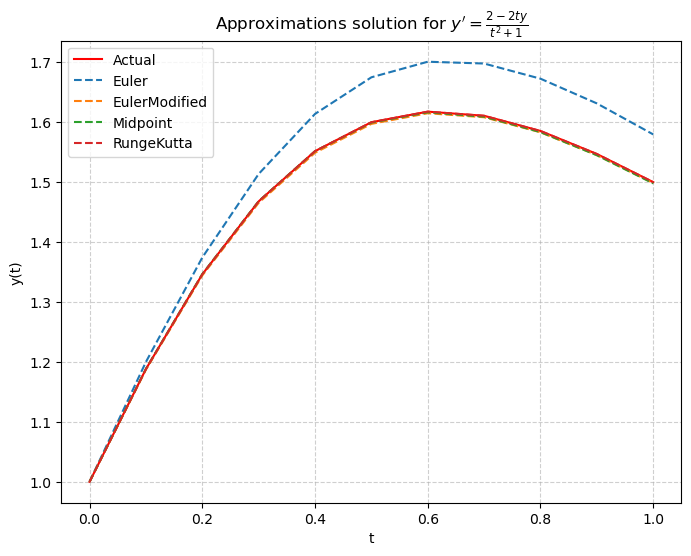

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = plt.gca()

ax.plot(res_all.index, res_all['Actual'], color='red', linestyle='-', label='Actual')

res_approximations = res_all.drop(columns=['Actual'])
for col in res_approximations.columns:
    sns.lineplot(data=res_approximations, x=res_approximations.index, y=col,
                 ax=ax, linestyle='--', label=col)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(r"Approximations solution for $ y' = \frac{2 - 2ty}{t^2 + 1}$");

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

With the graph above, it becomes visually clear the difference of the approximations to the actual solutions.

As we can see, the `Euler` (blue dashed line) method is well above the `Actual` (red solid line). This indicates the `Euler` is the least accurate. Also, the error seemse to increase the greater the value of `t` becomes. This is because we are approximating from approximations themselves. So the further we go up, the more error they accumulate.

It seems too that the other approximations are much closer to the actual and each other so let us investigate further.

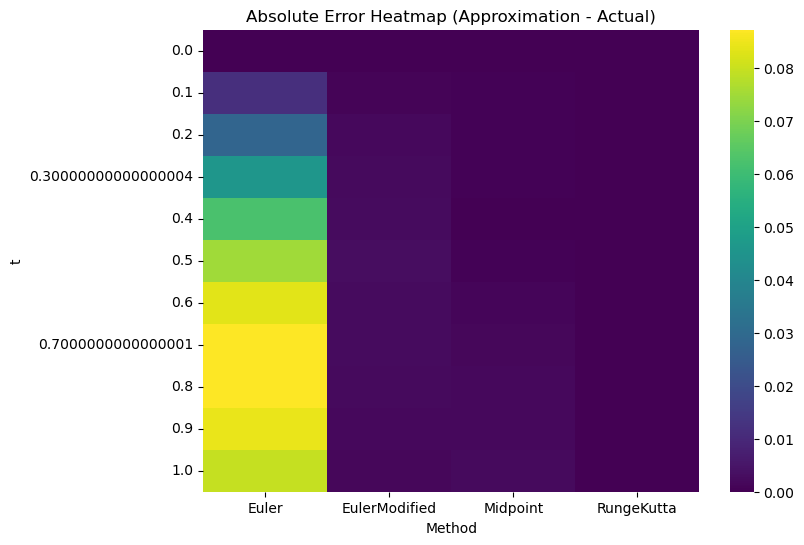

In [ ]:
app = res_all.drop(columns="Actual")
act = res_all['Actual']
diff = app.sub(act, axis=0)
abs_diff = np.abs(diff)

plt.figure(figsize=(8, 6))
sns.heatmap(abs_diff, cmap='viridis')
plt.xlabel('Method')
plt.ylabel('t')
plt.title('Absolute Error Heatmap (Approximation - Actual)');
plt.show()

By the error heatmap above, we can now see that `Euler` is the least accurate approximations. Followed by the `EulerModified` then `Midpoint` and finally `RungeKutta` as the most accurate one. 

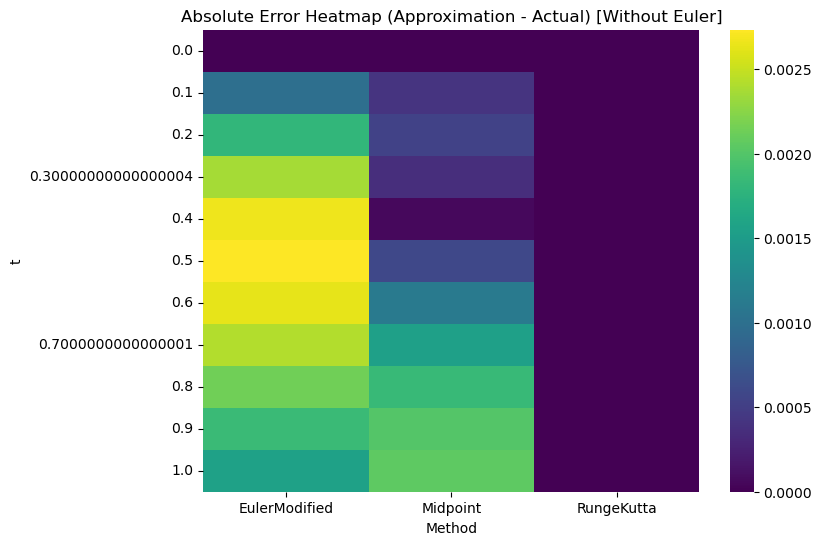

In [111]:
app = res_all.drop(columns=["Actual", "Euler"])
act = res_all['Actual']
diff = app.sub(act, axis=0)
abs_diff = np.abs(diff)

plt.figure(figsize=(8, 6))
sns.heatmap(abs_diff, cmap='viridis')
plt.xlabel('Method')
plt.ylabel('t')
plt.title('Absolute Error Heatmap (Approximation - Actual) [Without Euler]');
plt.show()

`Runge-Kutta` did really well!! 

---


## Use the Runge-Kutta for Systems Algorithm to approximate the solutions of the following differential equations. For each item, and each solution, plot the points and graph the the actual solution on one plane to compare

$$
\begin{aligned}
u_1' &= u_1 + 2u_2 - 2u_3 + e^{-t} \\
u_2' &= u_2 + u_3 - 2e^{-t} \\
u_3' &= u_1 + 2u_2 + e^{-t}
\end{aligned}

$$
$u_1(0) = 3, u_2(0) = -1, u_3(0) = 1, \quad 0 \leq t \leq 1, \quad \\ h = 0.1$ with actual solution:
$$

\begin{aligned}
u_1(t) &= -3e^{-t} - 3 \sin t + 6 \cos t \\
u_2(t) &= \frac{3}{2}e^{-t} + \frac{3}{10} \sin t - \frac{21}{10} \cos t - \frac{2}{5}e^{2t} \\
u_3(t) &= -e^{-t} + \frac{12}{5} \cos t + \frac{9}{5} \sin t - \frac{2}{5}e^{2t}
\end{aligned}
$$

In [ ]:
def f(t, u):
    u1 = u[0]
    u2 = u[1]
    u3 = u[2]
    du1dt = u1 + 2*u2 - 2*u3 + math.exp(-t)
    du2dt = u2 + u3 - 2*math.exp(-t)
    du3dt = u1 + 2*u2 + math.exp(-t)
    return np.array([du1dt, du2dt, du3dt])

a = 0.0
b = 1.0
N = 10
h = (b - a) / N
t = a
w = np.array([3.0, -1.0, 1.0])

results = []
results.append({'t': t, 'u1': w[0], 'u2': w[1], 'u3': w[2]})

for i in range(1, N + 1):
    k1 = h * f(t, w)
    k2 = h * f(t + h/2, w + k1/2)
    k3 = h * f(t + h/2, w + k2/2)
    k4 = h * f(t + h, w + k3)

    w = w + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    t = a + i * h

    results.append({'t': t, 'u1': w[0], 'u2': w[1], 'u3': w[2]})

rk4_results = pd.DataFrame(results).set_index('t')
rk4_results


,u1,u2,u3
t,,,
0.0,3.000000,-1.000000,1.000000
0.1,2.956013,-1.190863,1.174312
0.2,2.828200,-1.367171,1.294305
0.3,2.623005,-1.535167,1.355081
0.4,2.347153,-1.702133,1.350968
0.5,2.007630,-1.876603,1.275330
0.6,1.611655,-2.068628,1.120317
0.7,1.166649,-2.290085,0.876569
0.8,0.680190,-2.555068,0.532825


In [134]:

def actual_solution(t):
    u1 = -3 * math.exp(-t) - 3 * math.sin(t) + 6 * math.cos(t)
    u2 = (3/2) * math.exp(-t) + (3/10) * math.sin(t) - (21/10) * math.cos(t) - (2/5) * math.exp(2*t)
    u3 = -math.exp(-t) + (12/5) * math.cos(t) + (9/5) * math.sin(t) - (2/5) * math.exp(2*t)
    return np.array([u1, u2, u3])

actual_results = []
for i in range(N + 1):
    t_i = a + i * h
    u_actual = actual_solution(t_i)
    actual_results.append({'t': t_i, 'u1_actual': u_actual[0], 'u2_actual': u_actual[1], 'u3_actual': u_actual[2]})

actual_df = pd.DataFrame(actual_results).set_index('t')
actual_df

,u1_actual,u2_actual,u3_actual
t,,,
0.0,3.000000,-1.000000,1.000000
0.1,2.956012,-1.190864,1.174312
0.2,2.828199,-1.367173,1.294304
0.3,2.623004,-1.535171,1.355078
0.4,2.347151,-1.702139,1.350963
0.5,2.007627,-1.876612,1.275321
0.6,1.611651,-2.068641,1.120304
0.7,1.166644,-2.290105,0.876548
0.8,0.680185,-2.555097,0.532795


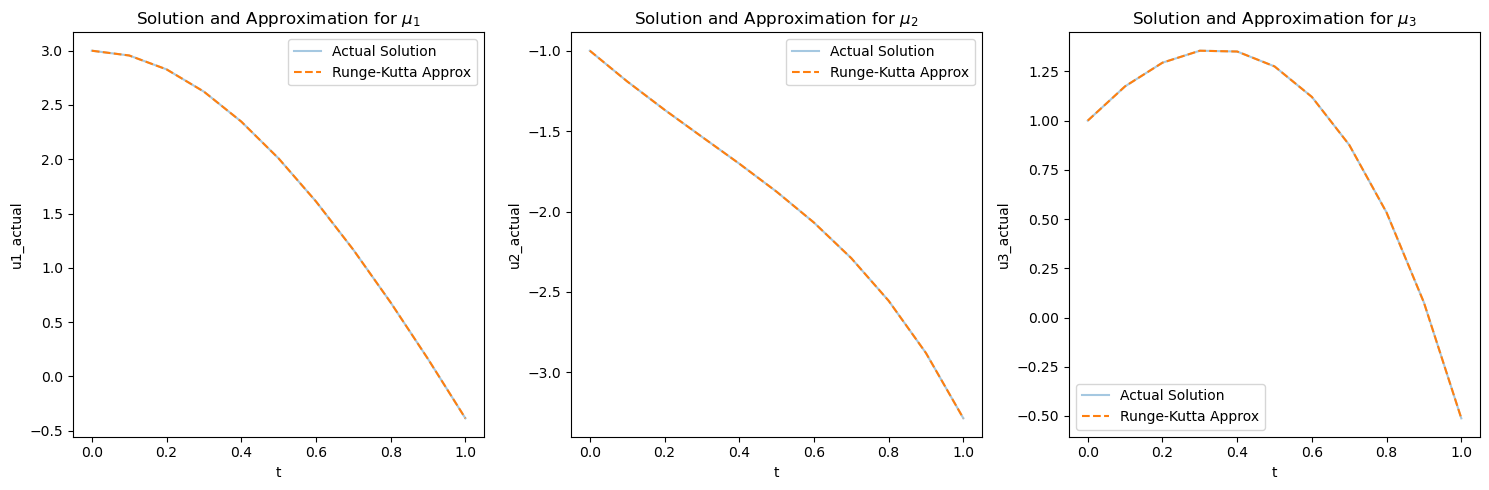

In [133]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
ax=ax.flatten()

for i in range(3):
    sns.lineplot(actual_df.iloc[:,i], ax=ax[i], label="Actual Solution", alpha=0.40)
    sns.lineplot(rk4_results.iloc[:,i], ax=ax[i], linestyle='--', label="Runge-Kutta Approx")

    if i == 0:
        ax[i].set_title(r"Solution and Approximation for $\mu_1$")
    elif i == 1:
        ax[i].set_title(r"Solution and Approximation for $\mu_2$")
    else:
        ax[i].set_title(r"Solution and Approximation for $\mu_3$")

plt.tight_layout()

Well the Runge-Kutta for Systems Algorithm seem to approximate the actual solutions really well. They are almost exactly the same with some error that are unnoticable if we graph them together

---

In [16]:
import math
import regex
import pandas as pd

class Sipnayan:
    def __init__(self, math_object, regex, pd):
        self.math_object = math_object
        self.reg = regex
        self.pd = pd

    def number_solver(self, equation):
        return eval(equation)
    
    def eq_solver(self, equation, var_val, var="x"):
        """"var != e
        Note to future romand: make varaible a list instead for equations beyond 2d
        """
        # print(f"Original: {equation}")
        equation = equation.replace(var, str(var_val))
        # print(f"Parsed: {equation}")
        # Check for other variable other than specified var
        if (self.check_for_other_var(equation, var)):
            return f"Letters detected aside from independent variable ({var})"
        operations = ["e", "cos", "sin", "tan", "ln"]
        if any(operation in equation for operation in operations):
            return eval(self.nested_handler(equation))
        return self.number_solver(equation)

    def trigo(self, trig_op, arg):
        match str(trig_op):
            case "cos":
                return self.math_object.cos(arg)
            case "sin":
                return self.math_object.sin(arg)
            case "tan":
                return self.math_object.tan(arg)
            case default:
                return "invalid argument"
                
    def exp_solve(self, arg):
        """For e^x with x as arg"""
        return self.math_object.exp(arg)

    def ln_solve(self, arg):
        return self.math_object.log(arg)
    
    def nested_handler(self, equation):
        operations = ["e\\^", "cos", "sin", "tan", "ln"]
        ops = ["e", "cos", "sin", "tan", "ln"]
        # print(f"Processing equation: {equation}")
        
        pat = rf'({"|".join(operations)})\(((?:[^\(\)]+|(?R))*)\)'
        # print(f"Regex pattern: {pat}")
        
        while any(operation in equation for operation in ops):
            match = regex.search(pat, equation)
            if not match:
                break

            opp = match.group(1)
            ovr_expression = match.group(0)  
            argument = match.group(2) 
            # print(f"Matched operation: {ovr_expression}, Argument: {argument}")
    
            if any(operation in argument for operation in ops):
                argument = self.nested_handler(argument)
    
            equation = self.special_operations(opp, ovr_expression, argument, equation)
            # print(f"Updated equation: {equation}")
        
        return equation
            
    def special_operations(self, opp, ovr_expression, argument, equation):
        # print(f"Processing {opp} with argument: {argument}")
        try:
            if "e" in opp:
                result = self.exp_solve(eval(argument))
            elif "ln" in opp:
                result = self.ln_solve(eval(argument))
            else:
                result = self.trigo(opp, eval(argument))
        except Exception as e:
            print(f"Error in {opp}: {e}")
            return equation
    
        updated_equation = equation.replace(ovr_expression, str(result))
        return updated_equation



    def check_for_other_var(self, equation, var):
        remove = ['cos', 'sin', 'tan', 'e', "ln"]
        for opp in remove:
            equation = equation.replace(opp,"")
        for i in equation:
            if i.isalpha() and i != var:
                return True
        return False

sip = Sipnayan(math, regex, pd)